In [77]:
from osgeo import gdal
import numpy as np
import pandas as pd
import bokeh.plotting as bp
import holoviews as hv
import geoviews as gv
import datashader as ds
import rasterio as rio
from holoviews.operation import contours
from holoviews.operation.datashader import datashade, aggregate
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno

#makes jupyter notebook screen wider
from IPython.core.display import HTML, display
display(HTML("<style>.container { width:80% !important; }</style>"))


#my code
import interactive_profiler

#importing the data
name = "Mandakini_fullProfileMC_forced_0.45_3_1258909000_10_80_281_for_Arc.csv" #Set file name
path = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/" #Set path to data
df = pd.read_csv(path+name)

#using Rasterio to import raster data
# newpath = '/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/'
# raster_data = rio.open(newpath+'Mandakini.bil')

Test_data = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/"
Test = gdal.Open(Test_data + "/Mandakini.bil")#Get raster data
M_DEM = Test.ReadAsArray()




x_range, y_range = define_boundaries(df, 10000)


x0 = min(x_range)
y0 = min(y_range)
x1 = max(x_range)
y1 = max(y_range)
test = (x0, y0, x1, y1)


(0, 0, 587, 648)


:DynamicMap   []
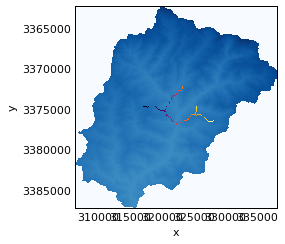

In [80]:
#%load_ext holoviews.ipython #must load this once

ras = hv.Raster(M_DEM)(style={'cmap':'Blues'})
print(ras.extents)
ras.extents = (x0, y0, x1, y1)

#pnt = hv.Points()

ras * shaded

:DynamicMap   []
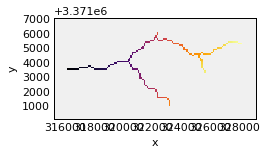

In [14]:

#hv.notebook_extension('bokeh', width=995)
hv.notebook_extension()

dataset = gv.Dataset(df, kdims=['x', 'y'], vdims=['elevation', 'chi', 'flow_distance'])
shade_defaults = dict(x_range=x_range, y_range=y_range, x_sampling=100, y_sampling=100, width=1200, height=660)

shaded = datashade(hv.Points(dataset),  cmap=inferno, aggregator=ds.mean('elevation'), **shade_defaults)

shaded





In [13]:
import numpy as np
import holoviews as hv
hv.notebook_extension('matplotlib')
fractal = hv.Image(np.load('AM.png'))

((fractal * hv.HLine(y=0)).hist() + fractal.sample(y=0))

IOError: Failed to interpret file 'AM.png' as a pickle

In [ ]:
#from lidar display demonstartion
df = dd.from_delayed([read_gnd(f) for f in LIDAR_XYZ_FILES])

kdims=['meterswest', 'metersnorth',]
dataset = gv.Dataset(df, kdims=kdims, vdims=['Z'])
shade_defaults = dict(x_range=x_range, y_range=y_range, x_sampling=1, y_sampling=1, width=800, height=455)
tri = hv.Points(dataset, kdims=kdims, vdims=['Z'])
shaded = datashade(tri, **shade_defaults)
df.head()

In [ ]:
#May 9th, working with streamlining datashader image and bokeh interactive plot with holoviews
import pandas as pd
import holoviews as hv
import geoviews as gv
import datashader as ds
import dask.dataframe as dd

from bokeh.models import WMTSTileSource
from cartopy import crs
from matplotlib.cm import get_cmap
from holoviews.operation.datashader import datashade, aggregate

from dask.diagnostics import ProgressBar
from dask.cache import Cache
ProgressBar().register()
Cachey(9e9).register()

hv.notebook_extension('bokeh', width=900)

%opts Overlay [width=800 height=455 xaxis=None yaxis=None show_grid=False] 
%opts Shape (fill_color=None line_width=1.5) [apply_ranges=False] 
%opts Points [apply_ranges=False] WMTS (alpha=0.5) NdOverlay [tools=['tap']]


# output_notebook()

In [ ]:
#older attempt at raster and shape

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno

import holoviews as hv
import geoviews as gv
from cartopy import crs

background = "black"

export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

source = ColumnDataSource(df)

#Define boundaries
x_range, y_range = define_boundaries(df, 10000)


f = Figure(x_range=x_range, y_range=y_range)
f.circle(df['x'],df['y'], source=source, color='red', size=10)



def base_plot(tools='pan,wheel_zoom,reset',plot_width=600, plot_height=600, x_range=None, y_range=None, **plot_args):
    p = Figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
              x_range=x_range, y_range=y_range, outline_line_color=None,
              min_border=0, min_border_left=0, min_border_right=0,
              min_border_top=0, min_border_bottom=0, **plot_args)
    #sizing_mode='scale_both',
    p.axis.visible = True
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    #p.add_title(STAMEN_TONER, alpha=0.5)
    return p



def basic_raster(x_range, y_range, w, h, how='log'):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.raster(raster_data)
    return tf.shade(agg, cmap=cm(inferno), how='linear', alpha=200) #tf.interpolate(...cmap=['darkred', 'white', 'darkblue'])



p = base_plot(x_range=x_range, y_range=y_range)
p.circle(df['x'],df['y'], source=source, color='red', size=10)

ii = InteractiveImage(plot, basic_raster)

# p = figure(title="Stream channel elevation map")
# p.circle(df['x'], df['y'], source=source, color='red', size=6)

#ii #* hv.Points([(df['x'][0],df['y'][0])])

InteractiveImage(p, basic_raster)

# out = layout([[ii]])#,[plot2], [plot3]])



# show(out)
